In [1]:
import mglearn

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jmhwang/miniconda3/envs/adp/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/home/jmhwang/miniconda3/envs/adp/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)


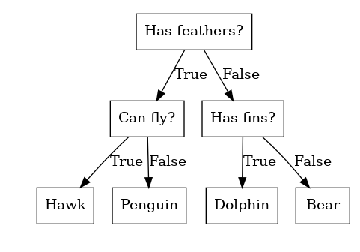

In [3]:
mglearn.plots.plot_animal_tree()

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
from sklearn.datasets import load_breast_cancer

In [7]:
from sklearn.model_selection import train_test_split

In [6]:
cancer = load_breast_cancer()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target, stratify=cancer.target, random_state=42)

In [10]:
tree = DecisionTreeClassifier(random_state=0)

In [11]:
tree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=0)

In [12]:
tree.score(X_train, y_train)

1.0

In [14]:
tree.score(X_test, y_test)

0.9370629370629371

# 사전 가지치기
- sklearn에서는 사전 가지치기만 지원

In [18]:
tree = DecisionTreeClassifier(max_depth=4, random_state=0)
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=0)

In [19]:
tree.score(X_train, y_train)

0.9882629107981221

In [20]:
tree.score(X_test, y_test)

0.951048951048951

# 결정트리 분석

In [26]:
cancer.data.shape

(569, 30)

In [21]:
from sklearn.tree import export_graphviz

In [22]:
export_graphviz(
    tree, 
    out_file='tree.dot', 
    class_names=["악성", "양성"], 
    feature_names=cancer.feature_names, 
    impurity=False, 
    filled=True)

In [23]:
import graphviz

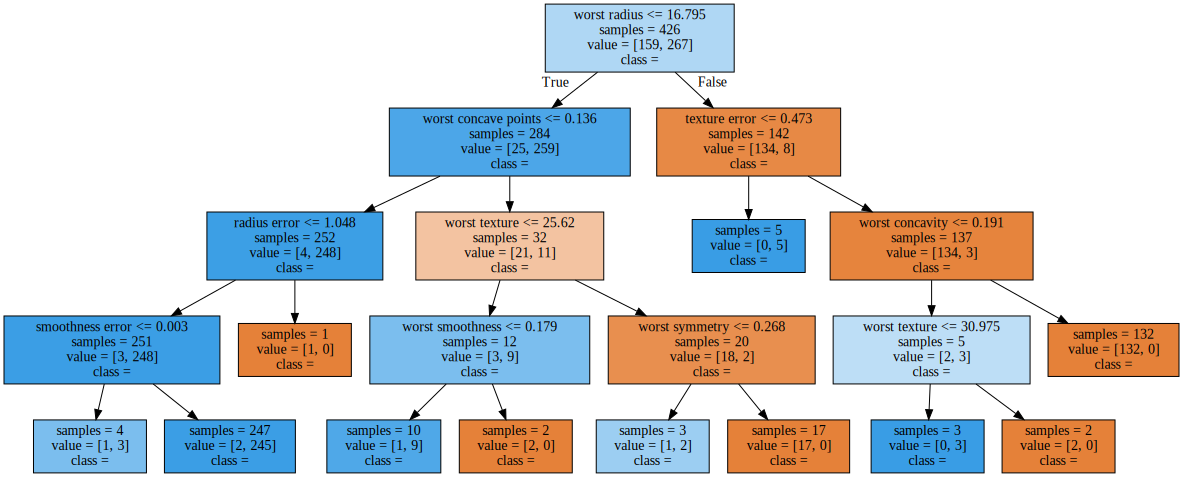

In [25]:
with open("tree.dot") as f:
    dot_graph = f.read()
    
display(graphviz.Source(dot_graph))

# 특성 중요도
- 총합은 1
- 중요도가 0이라고 해서 특성이 유용하지 않다는 뜻은 아님. 단지 모델이 특성을 선택하지 않았을뿐이고, 다른 특성이 동일한 정보를 지니고 있어서일 수 있음
- 중요도는 항상 양수
- 특성이 어떤 클래스를 지지하는지는 알 수 없음 ex) worst_radius가 중요하다가 알려주지만 양성인지 악성인지 알 수 없음

In [32]:
tree.feature_importances_

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.01019737, 0.04839825, 0.        , 0.        , 0.0024156 ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.72682851, 0.0458159 , 0.        , 0.        , 0.0141577 ,
       0.        , 0.018188  , 0.1221132 , 0.01188548, 0.        ])

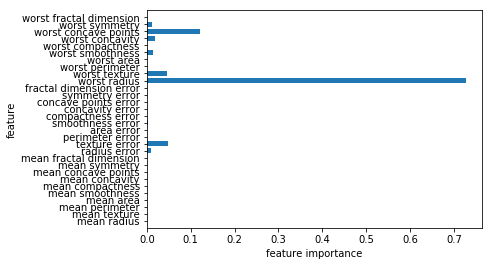

In [39]:
import matplotlib.pyplot as plt
import numpy as np

def plot_feature_importances_cancer(model):
    n_features = cancer.data.shape[1]
    plt.barh(np.arange(n_features), model.feature_importances_, align='center')
    plt.yticks(np.arange(n_features), cancer.feature_names)
    plt.xlabel('feature importance')
    plt.ylabel("feature")
    plt.ylim(-1, n_features)
    
plot_feature_importances_cancer(tree)

---

"X[1] 값이 높으면 클래스 0이고 값이 낮으면 1"이라고 없는 예
-> X[1]에 의해 단순히 비례 또는 반비례하지 않기 때문

Feature importances: [0. 1.]


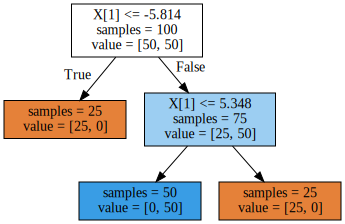

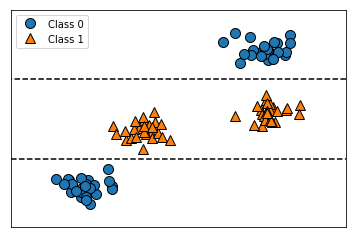

In [41]:
tree = mglearn.plots.plot_tree_not_monotone()
display(tree)

---

# 결정 트리를 이용한 회귀
- 외삽(exrapolation: 훈련 데이터 범위 밖의 데이터)에 대해서 예측을 할 수 없다.

In [44]:
import os
import pandas as pd

In [51]:
ram_prices = pd.read_csv(os.path.join(mglearn.datasets.DATA_PATH, "ram_price.csv"), index_col=0)

In [52]:
ram_prices

,date,price
0,1957.00,4.110418e+08
1,1959.00,6.794772e+07
2,1960.00,5.242880e+06
3,1965.00,2.642412e+06
4,1970.00,7.340030e+05
...,...,...
328,2015.58,4.500000e-03
329,2015.67,4.300000e-03
330,2015.75,4.200000e-03
331,2015.83,3.800000e-03


Text(0, 0.5, 'price ($/Mbyte)')

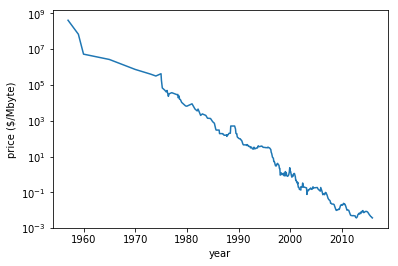

In [55]:
plt.yticks(fontname="Arial")
plt.semilogy(ram_prices.date, ram_prices.price)
plt.xlabel('year')
plt.ylabel('price ($/Mbyte)')

In [56]:
from sklearn.tree import DecisionTreeRegressor

In [60]:
data_train = ram_prices[ram_prices.date < 2000]

In [61]:
data_test = ram_prices[ram_prices.date >= 2000]

In [65]:
X_train = data_train.date[:, np.newaxis]

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [67]:
y_train = np.log(data_train.price)

In [69]:
tree = DecisionTreeRegressor().fit(X_train, y_train)

In [71]:
from sklearn.linear_model import LinearRegression

In [72]:
linear_reg = LinearRegression().fit(X_train, y_train)

In [73]:
X_all = ram_prices.date[:, np.newaxis]

/home/jmhwang/miniconda3/envs/adp/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  """Entry point for launching an IPython kernel.


In [74]:
pred_tree = tree.predict(X_all)

In [76]:
pred_lr = linear_reg.predict(X_all)

In [77]:
price_tree = np.exp(pred_tree)
price_lr = np.exp(pred_lr)

훈련 데이터에 대해서 - lr, tree 모두 잘 예측
테스트 데이터에 대해서 - lr은 잘 예측하지만, tree는 단순히 마지막 포인트를 이용해서 예측함

트리 기반의 모델로도 예측을 만들 수 있으나, 이 예제의 목적은
1. 트리 모델이 시계열 데이터엔 잘 맞지 않는다와
2. 트리가 어떻게 예측을 만드는지 특성을 보여주기 위함

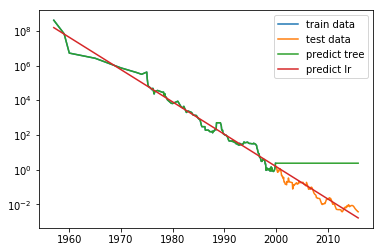

In [82]:
plt.semilogy(data_train.date, data_train.price, label="train data")
plt.semilogy(data_test.date, data_test.price, label="test data")
plt.semilogy(ram_prices.date, price_tree, label="predict tree")
plt.semilogy(ram_prices.date, price_lr, label="predict lr")
plt.legend()

장점
- 쉽게 시각화 할 수 있어서 비전문가도 이해하기 쉬움 (비교적 작은 트리일떄)
- 데이터 스케일에 구애받지 않음

단점
- 사전 가지치기를 이용해도 과대적합되는 경향이 있어서 일반화 성능이 좋지 않음